In [1]:
import cv2
import numpy as np
import mediapipe as mp
import pandas as pd
from tqdm.notebook import tqdm
import time
import pyautogui

In [2]:
photo_data = pd.read_csv('./traindata02/photo_data.csv', header=None).to_numpy()

In [3]:
photo_data.shape

(4281, 99)

In [4]:
len(photo_data)
photo_data = photo_data.tolist()

In [5]:
from sklearn.model_selection import train_test_split

a = 0

for i in tqdm(range(2420)):
    photo_data[i].append(1)
    a+=1
    if a<1:
        print(photo_data[i])

for i in tqdm(range(2420,len(photo_data))):
    photo_data[i].append(0)
    a+=1
    if a<1:
        print(photo_data[i][:2])


  0%|          | 0/2420 [00:00<?, ?it/s]

  0%|          | 0/1861 [00:00<?, ?it/s]

In [6]:
x = []
y = []
for i in tqdm(photo_data):
    x.append(i[:99])
    y.append([i[99]])

  0%|          | 0/4281 [00:00<?, ?it/s]

In [7]:
len(photo_data[1])
photo_data[1][99]

1

In [8]:
y[:1]

[[1]]

In [9]:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, 
                                                      test_size=0.2, 
                                                      shuffle=True, 
                                                      stratify=y, 
                                                      random_state=42)

In [10]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=99)
# pca.fit(x_t)
# x_train = pca.transform(x_t)
# x_valid = pca.transform(x_v)

In [11]:
y

[[1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1]

In [12]:
import numpy as np

# 데이터셋 생성
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_valid)
y_test = np.array(y_valid)

print(x_train.shape)
print(x_test.shape)

(3424, 99)
(857, 99)


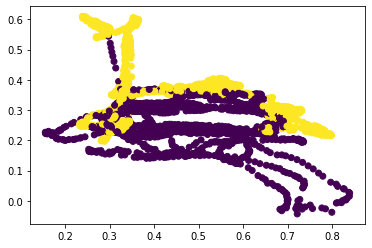

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

# 데이터셋 확인 (2차원)
plot_x = x_train[:,0]
plot_y = x_train[:,1]
plot_color = y_train.reshape(3424,)

plt.scatter(plot_x, plot_y, c=plot_color)
plt.show()

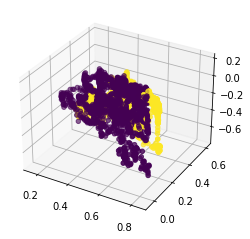

In [14]:
# 데이터셋 확인 (3차원)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

plot_x = x_train[:,0]
plot_y = x_train[:,1]
plot_z = x_train[:,2]
plot_color = y_train.reshape(3424,)

ax.scatter(plot_x, plot_y, plot_z, c=plot_color)
plt.show()

In [15]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=99, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                3200      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,233
Trainable params: 3,233
Non-trainable params: 0
_________________________________________________________________


In [16]:
# 3. 모델 학습과정 설정하기
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
107/107 [==============================] - 1s 2ms/step - loss: 0.5149 - accuracy: 0.7453
Epoch 2/25
107/107 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8373
Epoch 3/25
107/107 [==============================] - 0s 2ms/step - loss: 0.3532 - accuracy: 0.8657
Epoch 4/25
107/107 [==============================] - 0s 2ms/step - loss: 0.3150 - accuracy: 0.8864
Epoch 5/25
107/107 [==============================] - 0s 2ms/step - loss: 0.2842 - accuracy: 0.8943
Epoch 6/25
107/107 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.9016
Epoch 7/25
107/107 [==============================] - 0s 2ms/step - loss: 0.2374 - accuracy: 0.9109
Epoch 8/25
107/107 [==============================] - 0s 2ms/step - loss: 0.2198 - accuracy: 0.9209
Epoch 9/25
107/107 [==============================] - 0s 2ms/step - loss: 0.2040 - accuracy: 0.9267
Epoch 10/25
107/107 [==============================] - 0s 3ms/step - loss: 0.1898 - accuracy: 0.9320

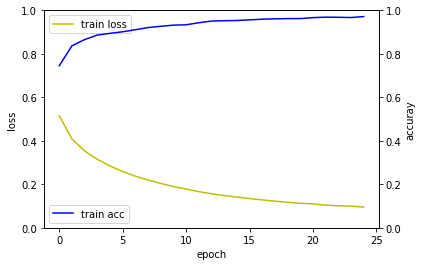

27/27 [==============================] - 0s 2ms/step - loss: 0.1309 - accuracy: 0.9428
loss_and_metrics : [0.13085103034973145, 0.9428238272666931]


In [17]:

# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.set_ylim([0.0, 1.0])
acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss_and_metrics : ' + str(loss_and_metrics))

In [18]:
def getp(data):
    p = model.predict(data)[0][0]
    p = int(p*10000)
    p = float(p)/100
    return p

In [19]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic
count=0
BG_COLOR = (0, 0, 0) # gray
MASK_COLOR = (1, 1, 1) # white

cap = cv2.VideoCapture('./test.mp4')

prev_time = 0
FPS = 10

# while True:

#     ret, frame = video.read()
    
#     current_time = time.time() - prev_time

#     if (ret is True) and (current_time > 1./ FPS) :
    	
#         prev_time = time.time()
        
#         cv2.imshow('VideoCapture', frame)
    	
#         if cv2.waitKey(1) > 0 :
            
#             break
idx=0
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():
        idx+=1
#         time.sleep(0.001)
#         pyautogui.PAUSE = 1    # 딜레이 관련 (default = 0.1 초)
        pyautogui.FAILSAFE = False  # 강제 초기화 비활성
        success, image = cap.read()
        if not success:
            print("Ignoring empty camera frame.")
    # If loading a video, use 'break' instead of 'continue'.
            continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
        image.flags.writeable = False
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = holistic.process(image)
        
        n=[]
        if results.pose_landmarks:
            for data_point in results.pose_landmarks.landmark:
                n.append(data_point.x)
                n.append(data_point.y)
                n.append(data_point.z)
        else:
            for _ in range(99):
                n.append(0)

        nowdata = [n]
#         print(len(n))
        life_probability = getp(nowdata)
        text="probability : {}".format(round(life_probability,2))
        org=(30,30)
        font=cv2.FONT_HERSHEY_SIMPLEX
 


    # Draw landmark annotation on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        save_image = image.copy()
#         mp_drawing.draw_landmarks(
#             image,
#             results.face_landmarks,
#             mp_holistic.FACEMESH_CONTOURS,
#             landmark_drawing_spec=None,
#             connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())
        mp_drawing.draw_landmarks(
            image,
            results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())

        if life_probability>80:
            cv2.imwrite('./flp/test001/annotated_image{:0>4}'.format(idx)+'.png', save_image)
#         image = cv2.flip(image, 1)
        cv2.putText(image,text,org,font,1,(255,0,0),2)
    # Flip the image horizontally for a selfie-view display.
        cv2.imshow('MediaPipe Holistic', image)
        if cv2.waitKey(1) & 0xFF == 27:
#         if cv2.waitKey(5)==27:
            break
        
cv2.destroyAllWindows()
cap.release()


1/1 [==============================] - 0s 41ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 35ms/step


1/1 [==============================] - 0s 37ms/step


1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 40ms/step


1/1 [==============================] - 0s 38ms/step


In [ ]:
print(model.predict(nowdata)[0][0])

In [ ]:
mp_drawing.plot_landmarks(results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)


In [ ]:
getp(nowdata)